In [35]:
import pandas as pd
from google.colab import drive
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import re
from random import random
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#extracting signals from xls

signals = {}
for i in range(1):
  subject = 'Subject'+str(i+1)
  signals[subject] = {}
  path = '/content/drive/MyDrive/Dados_Acelerometro/'+subject+'/'+subject+'_stop.xls'
  xls = pd.ExcelFile(path) # use r before absolute file path 
  signals[subject]['stop'] = {}
  sheetX = xls.parse(0)
  for j in sheetX.keys():
    j_new = j.replace(" ", "_")
    signals[subject]['stop'][j_new] = np.array(sheetX[j])
    print(subject+" : "+j_new+" : ")
    print(signals[subject]['stop'][j_new])
  path = '/content/drive/MyDrive/Dados_Acelerometro/'+subject+'/'+subject+'_light_tremor.xls'
  xls = pd.ExcelFile(path) # use r before absolute file path 
  signals[subject]['light_tremor'] = {}
  sheetX = xls.parse(0)
  for j in sheetX.keys():
    j_new = j.replace(" ", "_")
    signals[subject]['light_tremor'][j_new] = np.array(sheetX[j])
    print(subject+" : "+j_new+" : ")
    print(signals[subject]['light_tremor'][j_new])
  path = '/content/drive/MyDrive/Dados_Acelerometro/'+subject+'/'+subject+'_intense_tremor.xls'
  xls = pd.ExcelFile(path) # use r before absolute file path 
  signals[subject]['intense_tremor'] = {}
  sheetX = xls.parse(0)
  for j in sheetX.keys():
    j_new = j.replace(" ", "_")
    signals[subject]['intense_tremor'][j_new] = np.array(sheetX[j])
    print(subject+" : "+j_new+" : ")
    print(signals[subject]['intense_tremor'][j_new])
  
 

Subject1 : Time_(s) : 
[4.43745920e-02 4.68387070e-02 4.92779260e-02 ... 9.57791446e+01
 9.57815684e+01 9.57839914e+01]
Subject1 : Acceleration_x_(m/s^2) : 
[0.49079025 0.49079025 0.49797252 ... 0.07661115 0.08379345 0.07661115]
Subject1 : Acceleration_y_(m/s^2) : 
[1.1659261  1.1659261  1.1922611  ... 1.71656871 1.71656871 1.71417475]
Subject1 : Acceleration_z_(m/s^2) : 
[9.99536228 9.99536228 9.97860432 ... 9.49499607 9.51414776 9.53330135]
Subject1 : Absolute_acceleration_(m/s^2) : 
[10.07509434 10.07509434 10.06190873 ...  9.64921902  9.66812479
  9.68649054]
Subject1 : Time_(s) : 
[2.07304790e-02 2.31945410e-02 2.56337600e-02 ... 9.39983900e+01
 9.40008131e+01 9.40032367e+01]
Subject1 : Acceleration_x_(m/s^2) : 
[-0.01915279 -0.01915279 -0.0071823  ...  1.84345603  1.79796815
  1.78839171]
Subject1 : Acceleration_y_(m/s^2) : 
[1.97034323 1.97034323 1.97513151 ... 2.47549796 2.61914396 2.7268784 ]
Subject1 : Acceleration_z_(m/s^2) : 
[9.53330135 9.53330135 9.5476656  ... 8.3697691 

In [37]:
len(signals['Subject1']['stop']['Time_(s)'])

39510

In [38]:
len(signals['Subject1']['stop']['Absolute_acceleration_(m/s^2)'])

39510

In [39]:
#selecting the central 60s from the record

for i,j in signals['Subject1'].items():
  indices = np.where(j['Time_(s)']<15)[0]
  j['Time_(s)'] = np.delete(j['Time_(s)'], indices)
  indices2 = np.where(j['Time_(s)']>75)[0]
  j['Time_(s)'] = np.delete(j['Time_(s)'], indices2)
  j['Acceleration_x_(m/s^2)'] = np.delete(j['Acceleration_x_(m/s^2)'], indices)
  j['Acceleration_x_(m/s^2)'] = np.delete(j['Acceleration_x_(m/s^2)'], indices2)
  j['Acceleration_y_(m/s^2)'] = np.delete(j['Acceleration_y_(m/s^2)'], indices)
  j['Acceleration_y_(m/s^2)'] = np.delete(j['Acceleration_y_(m/s^2)'], indices2)
  j['Acceleration_z_(m/s^2)'] = np.delete(j['Acceleration_z_(m/s^2)'], indices)
  j['Acceleration_z_(m/s^2)'] = np.delete(j['Acceleration_z_(m/s^2)'], indices2)
  j['Absolute_acceleration_(m/s^2)'] = np.delete(j['Absolute_acceleration_(m/s^2)'], indices)
  j['Absolute_acceleration_(m/s^2)'] = np.delete(j['Absolute_acceleration_(m/s^2)'], indices2)




In [40]:
def plot_signals(t:list,chanels:list,text:str):
  hex = '#{:06X}'.format(round(random() * 0xffffff))
  f = plt.figure(figsize=(100,5))
  plt.subplot(1,1,1, title=text)
  plt.xlabel('s', fontsize=10)
  plt.ylabel('m/s^2', fontsize=10)
  plt.stem(t, chanels, linefmt=hex)

  plt.show()

In [41]:
len(signals['Subject1']['stop']['Time_(s)'])

24761

In [42]:
len(signals['Subject1']['stop']['Absolute_acceleration_(m/s^2)'])

24761

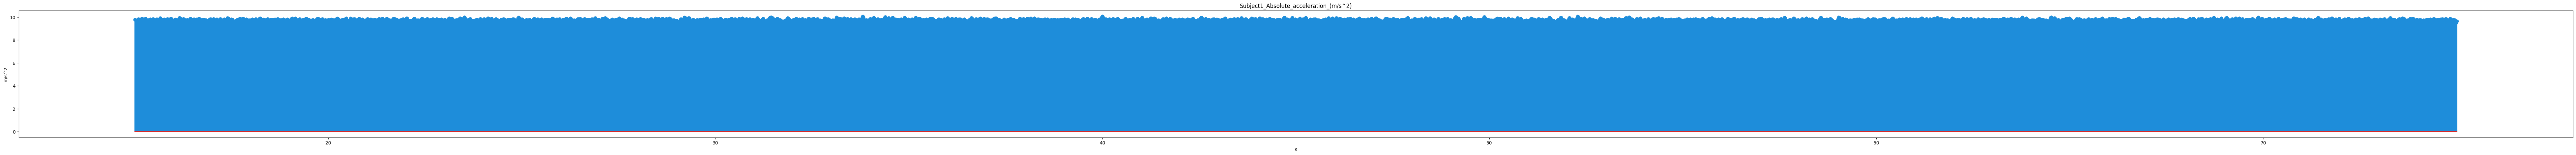

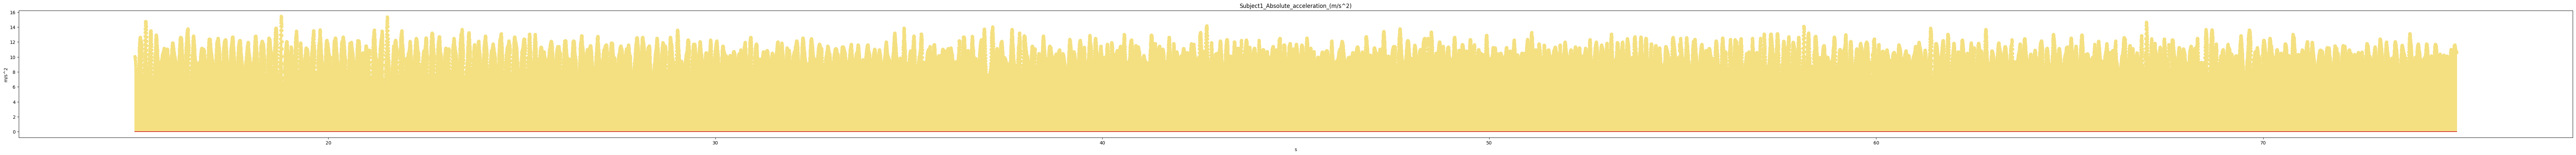

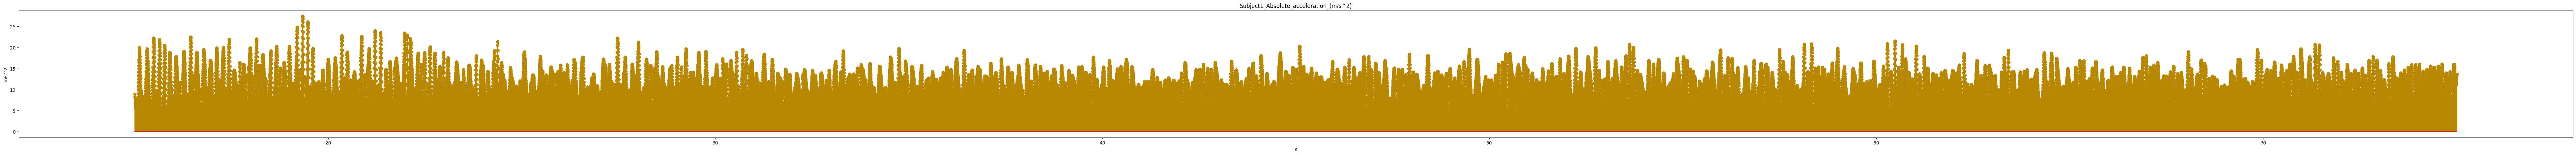

In [43]:
plot_signals(signals['Subject1']['stop']['Time_(s)'],signals['Subject1']['stop']['Absolute_acceleration_(m/s^2)'],'Subject1_Absolute_acceleration_(m/s^2)')
plot_signals(signals['Subject1']['light_tremor']['Time_(s)'],signals['Subject1']['light_tremor']['Absolute_acceleration_(m/s^2)'],'Subject1_Absolute_acceleration_(m/s^2)')
plot_signals(signals['Subject1']['intense_tremor']['Time_(s)'],signals['Subject1']['intense_tremor']['Absolute_acceleration_(m/s^2)'],'Subject1_Absolute_acceleration_(m/s^2)')

In [44]:
print(signals['Subject1']['stop']['Time_(s)'][0],signals['Subject1']['stop']['Time_(s)'][-1])

15.000510321 74.99952285


In [26]:
def PSD(chanels:list,text:str, ch:int):
  fs = 250
  s = chanels
  (f, S) = signal.periodogram(s, fs, scaling='density')
  fig = plt.figure(figsize=(100,5))
  plt.subplot(1,4,ch, title=text)
  plt.semilogy(f, S)
  #plt.ylim([1e-7, 1e2])
  plt.xlim([0,130])
  plt.xlabel('frequency [Hz]')
  plt.ylabel('PSD [V**2/Hz]')
  plt.vlines(x=125,ymin = 0, ymax = 1e2, colors = 'r')
  plt.show()

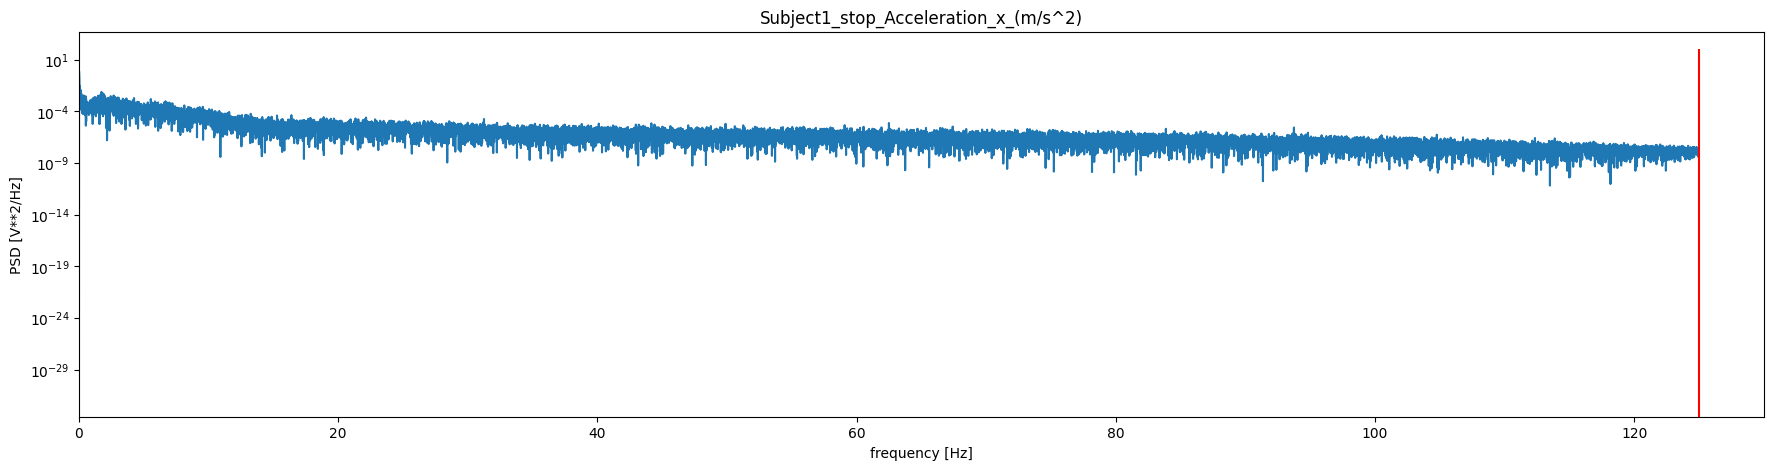

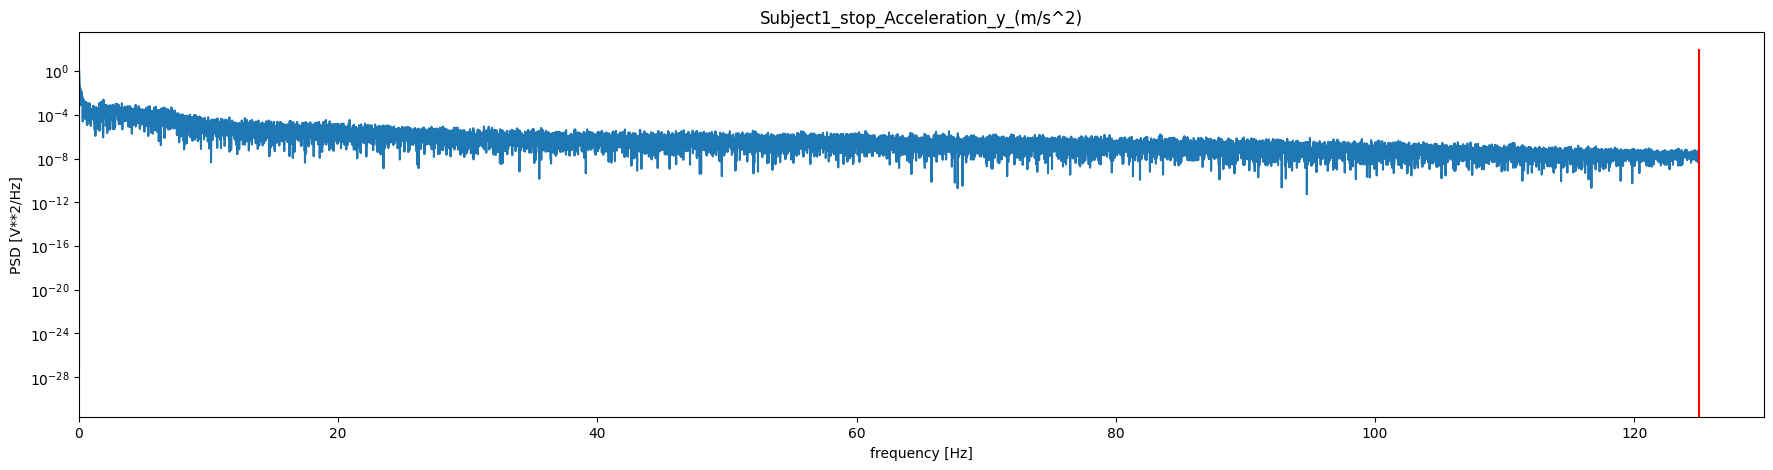

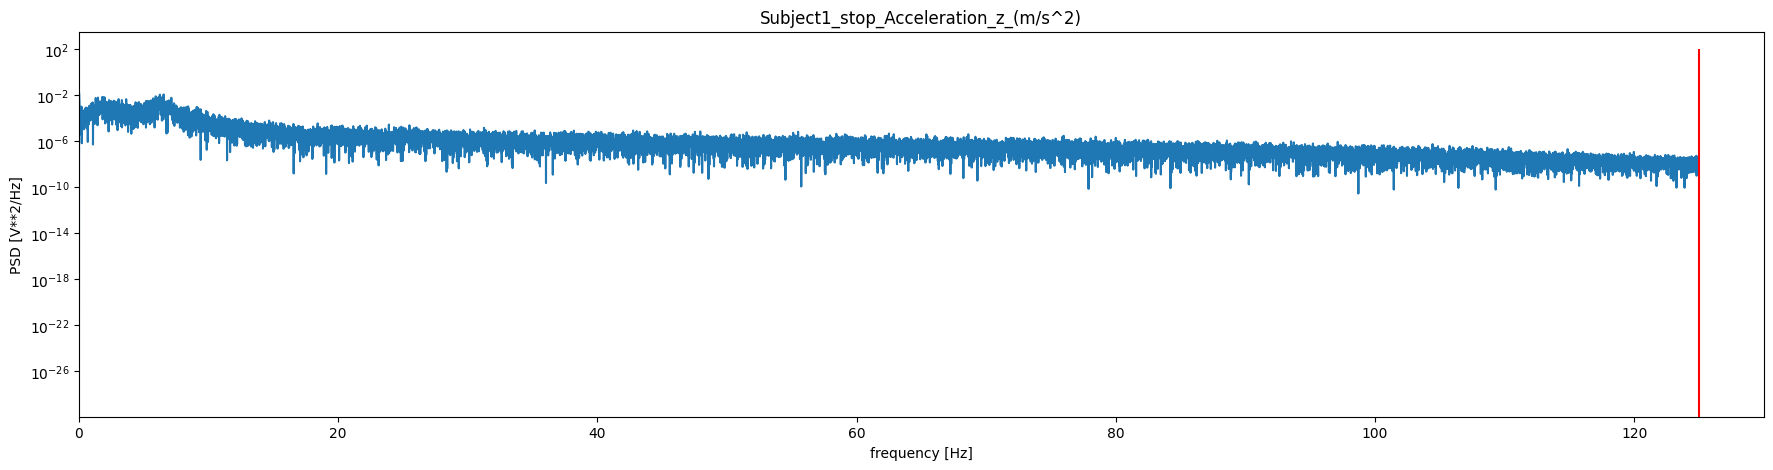

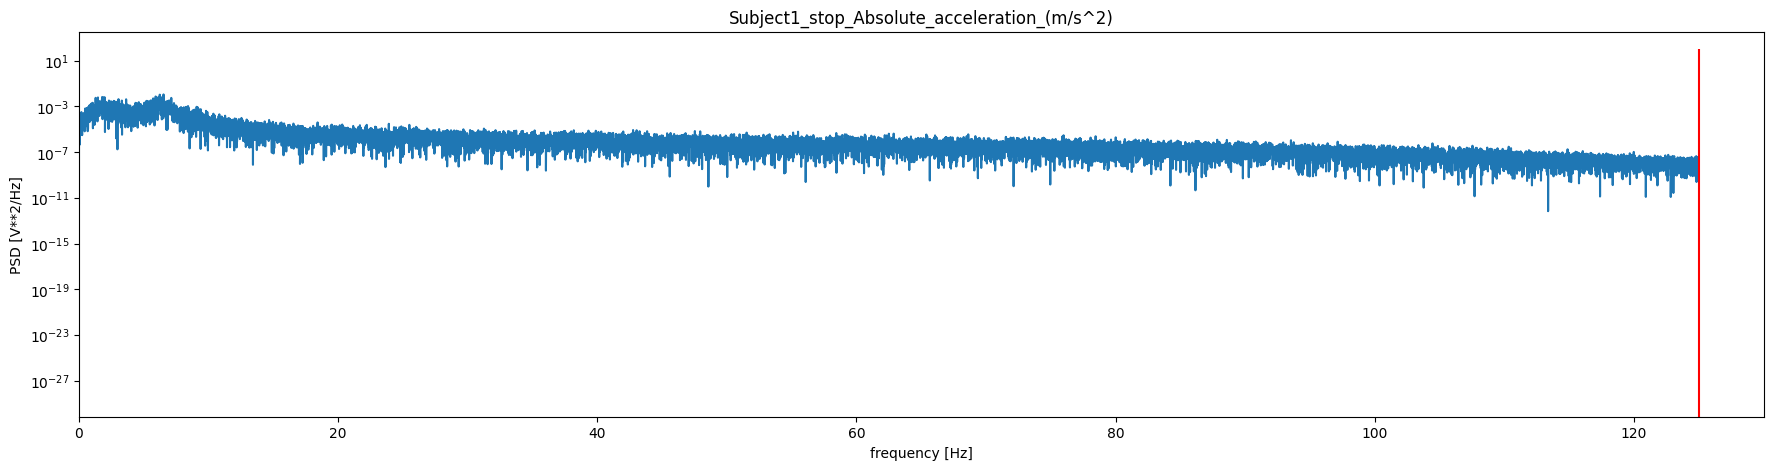

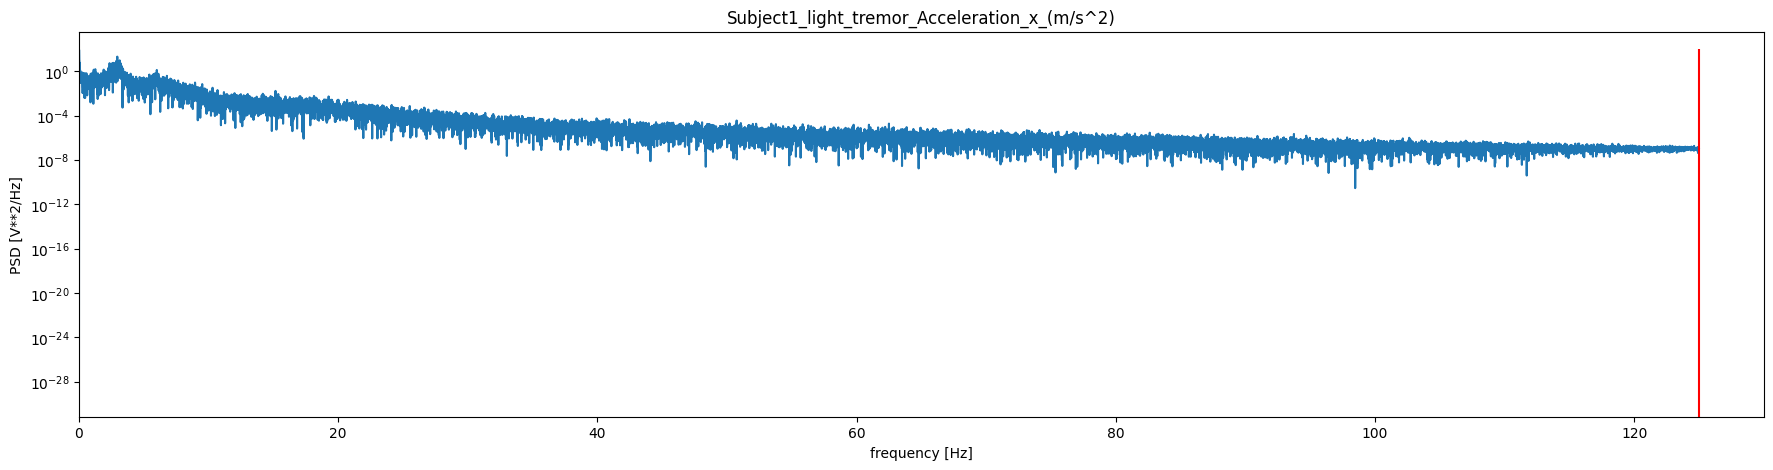

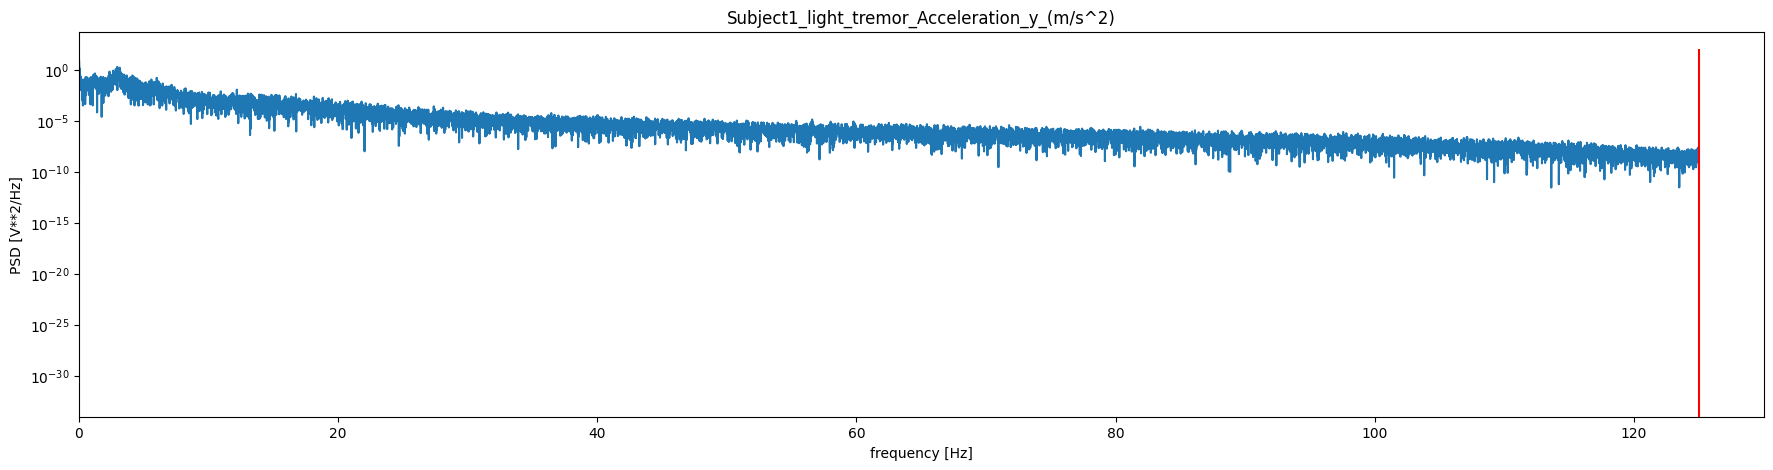

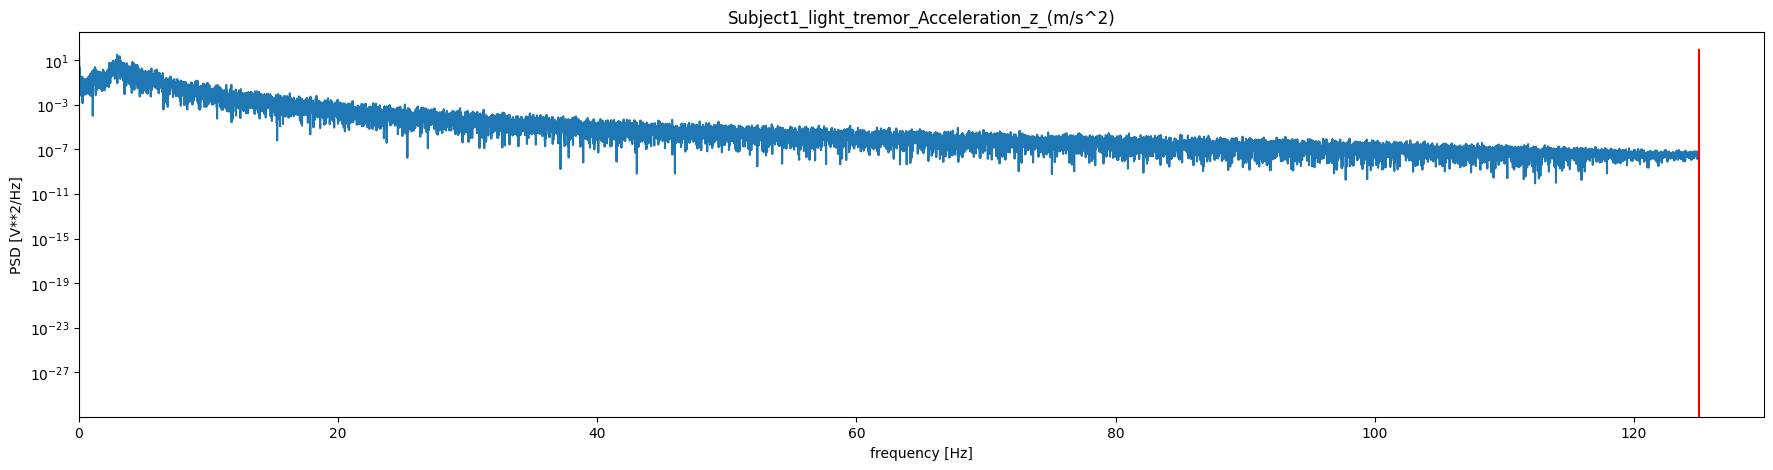

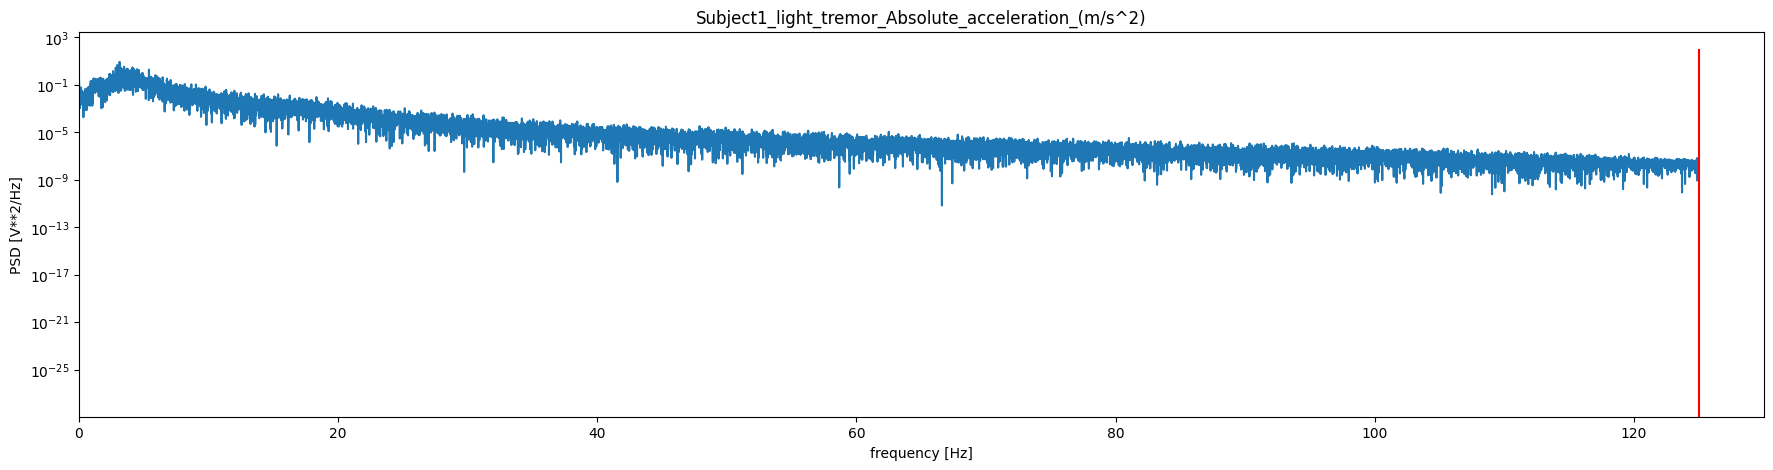

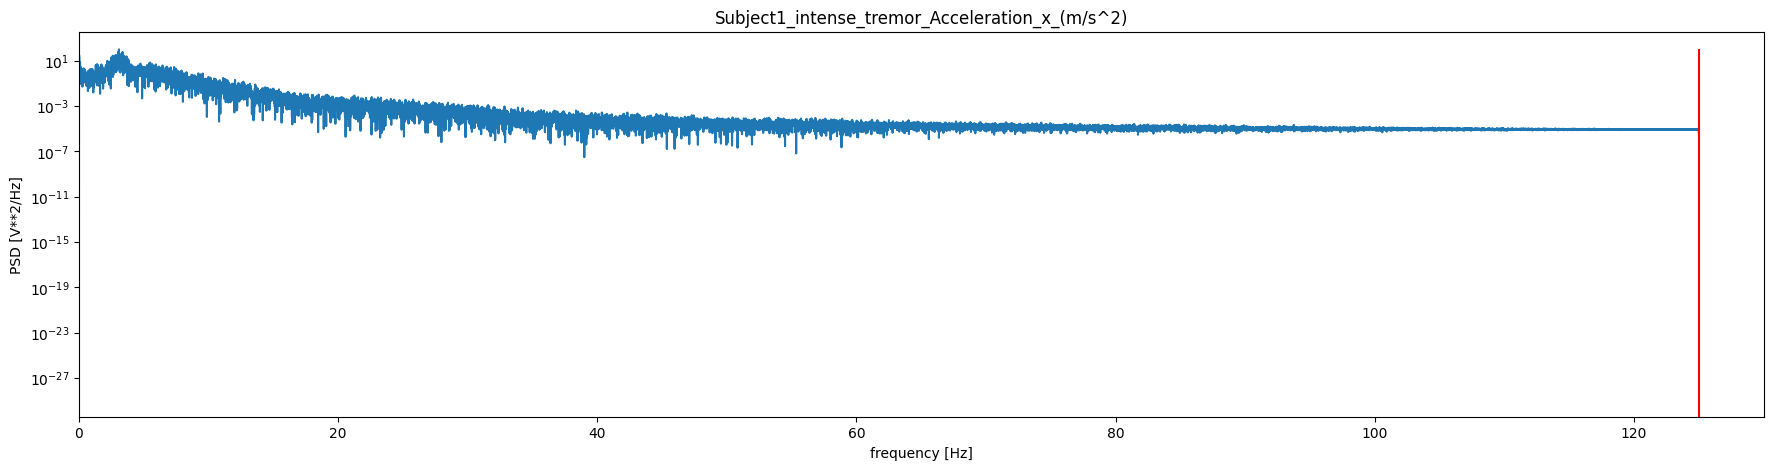

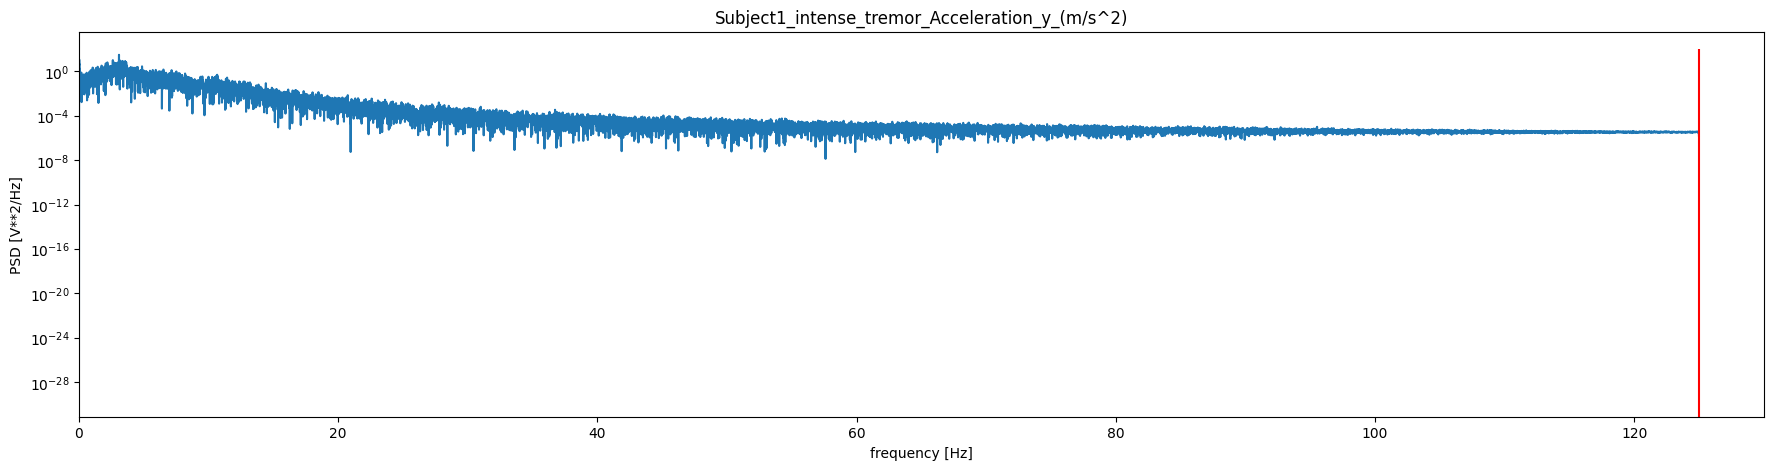

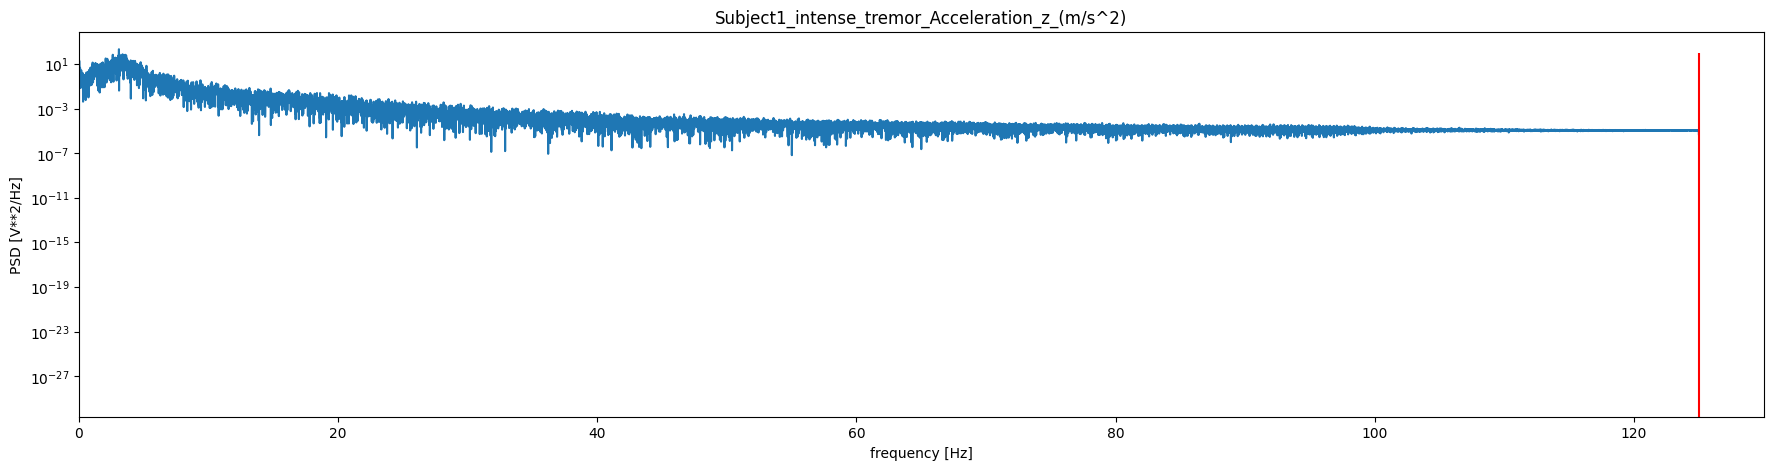

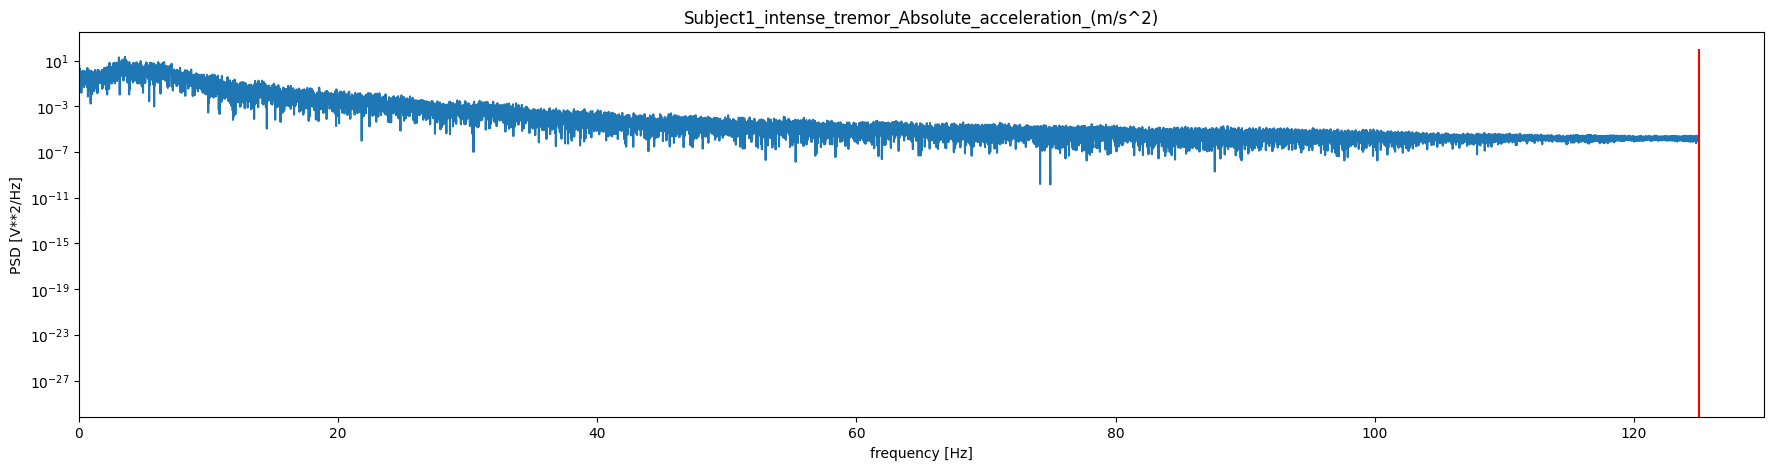

In [27]:
for i,j in signals['Subject1'].items():
  for k,l,m in zip(j.keys(),j.values(),range(5)):
    if m!=0:
      PSD(l,'Subject1_'+i+'_'+k,m)